## Задание 1
Требуется написать и отправить код, в котором будет выполнено:  
1.	Подключение к базе данных.
2.	Запрос SQL для загрузки данных за январь 2021 г (необходимо отфильтровать данные, а также сгруппировать выработку, чтобы получить среднюю и суммарную посуточно).
3.	Обработка данных.  

### Исходные данные
СУБД: MS SQL 
Название БД: qwerty  
Пользовать: user  
Пароль: password  
IP-адрес сервера: 85.114.8.250  

В базе данных находятся следующие таблицы:  
<u>**Date:**</u>  
•	Date_id  
•	Date_time (время в формате “%Y.%M.%D”)  
<u>**Hour:**</u>  
•	Hour_id  
•	Hour (номер часа от 0 до 23)  
<u>**Stations:**</u>  
•	Station_name  
•	Gen_unit_id  
•	Gen_unit_name  
<u>**Generation:**</u>  
•	Date_id  
•	Hour_id  
•	Gen_unit_id  
•	Generation_hour (выработка электроэнергии за час)  

В результате выполнения кода должна получиться следующая таблица
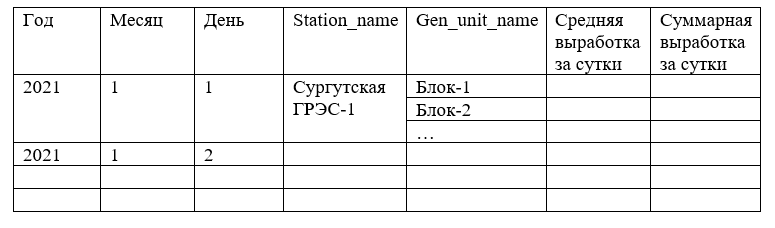

In [7]:
import pyodbc

In [1]:
server = '85.114.8.250'
database = 'qwerty'
username = 'user'
password = 'password'   
driver= '{ODBC Driver 18 for SQL Server}'

cnxn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+password)
cursor = cnxn.cursor()

In [ ]:
request = '''
          SELECT YEAR(Date_time) AS Год,
                 MONTH(Date_time) AS Месяц,
                 DAY(Date_time) AS День,
                 Station_name,
                 Gen_unit_name,
                 AVG(Generation_hour) AS 'Средняя выработка за сутки',
                 SUM(Generation_hour) AS 'Суммарная выработка за сутки'
            FROM Generation 
                 INNER JOIN Stations USING(Gen_unit_id)
                 INNER JOIN Date USING(Date_id)
                 INNER JOIN Hour USING(Hour_id)
           WHERE Date_time BETWEEN '2021.01.01' AND '2021.12.31'
        GROUP BY Date_time,
                 Station_name, 
                 Gen_unit_name
        ORDER BY Год, Месяц, День
        ''' 

cursor.execute(request)
row = cursor.fetchone() 
while row: 
    print(row[0])
    row = cursor.fetchone()